# Proximal point method
\begin{equation}
x^{k+1} = prox_{\tau_k J}( x^k ) = \underset{x \in \mathbb{R}^n}{\arg\min} \frac{1}{2} \| x - x^k \|^2 + \tau_k J( x )
\end{equation}

We consider the following objective
\begin{equation}
J(x) = \frac{1}{2} \| Ax - b \|^2 + \alpha \|D x \|_1
\end{equation}

the respective subdifferentials $F(x) = \frac{1}{2} \| Ax - b \|^2$ and $G(x) = \|Dx\|_1$
\begin{equation}
\partial F(x) = \{ \nabla F(x)\} = \{ A^T ( Ax - b ) \}
\end{equation}

\begin{equation}
\partial G(x) = \partial \left( \| \cdot \|_1 \circ D \right)(x) = D^T \partial \| D x \|_1 
\end{equation}

where for any $x \in \mathbb{R}^n$
\begin{equation}
\partial \| x \|_1
= \sum\limits_{i=1}^n sign( x_i ) \mathbf{1}_{\mathbb{R} \setminus \{0\}}( x_i )  e_i + \mathbf{1}_{\{0\}}( x_i ) [-e_i, e_i ]
\end{equation}

for this problem in particular the proximal point method takes the form
\begin{eqnarray}
x^{k+1} 
& = & prox_{\tau_k J}( x^k ) \\
& = & \underset{x \in \mathbb{R}^n}{\arg\min} \frac{1}{2} \| x - x^k \|^2 + \tau_k J( x ) \\
& = & \underset{x \in \mathbb{R}^n}{\arg\min} \frac{1}{2} \| x - x^k \|^2 + \frac{1}{2} \tau_k \| Ax - b \|^2 + \tau_k \alpha \|D x \|_1
\end{eqnarray}

In [141]:
import numpy as np
from scipy import sparse, linalg
from matplotlib import cm
from matplotlib import pyplot as plt

In [143]:
A = np.random.rand( 1000, 2 )
D = np.random.rand( 1000, 2 )
b = np.random.rand( 1000 )

\begin{equation}
prox_{\tau G}(x) = 
\end{equation}

In [227]:
def prox_norm_1( x, tau ) :
    n = x.size
    y = np.zeros( n )
    for i in range( 0, n ):
        if x[i] >= tau :
            y[i] = x[i] - tau
        elif x[i] <= -tau:
            y[i] = x[i] + tau
            
    return y

def prox_abs_1( x, tau ) :
    y = 0
    if x >= tau :
        y = x - tau
    elif x <= -tau:
        y = x + tau
            
    return y

def prox_norm_2( x, tau ) :
    n = x.size
    y = np.zeros( n )
    nx = linalg.norm( x )
    if nx >= tau or nx != 0 :
        y = ( 1 - tau / nx ) * x

    return y

def prox_norm_1_scalar( d, x, tau ) :
    nd = linalg.norm( d )**2
    p = x + ( prox_abs_1( d.dot( x ), tau * nd ) - d.dot( x ) ) * ( 1 / ( tau * nd ) ) * d
    return p
        

In [286]:
m = A.shape[0]
n = A.shape[1]

K = A.T.dot( A )
c = A.T.dot( b )

e = 1e-12
N = 10000
k = 0

alpha = 0.5
tau = 0.000000001
# x = np.random.rand( n )
x = np.ones( n )
ng = 2 * e 

G = []
F = []
while k < N and ng > e:
    # gradient descent
#     g = A.T.dot( A.dot( x ) - b ) + alpha * D.T.dot( np.sign( D.dot( x ) ) )   
#     x = x - tau * g

    # proximal point
#     for i in range( 0, n ) :
#         x = prox_norm_1_scalar( D[i,], x, tau * alpha )
#     x = np.linalg.solve( np.identity( n ) + tau * K, x - tau * c )
    
    # forward-backward splitting
    g = A.T.dot( A.dot( x ) - b )
    for i in range( 0, n ) :
        x = prox_norm_1_scalar( D[i,], x - tau * g, tau )
    
    
#     ng = linalg.norm( g )
#     G.append( ng )
    F.append( 0.5 * linalg.norm( A.dot( x ) - b )**2 + alpha * linalg.norm( D.dot( x ), 1 ) )
    k = k + 1

print( k )
print( g )
print( x )
# print( ng )


10000
[-228.55243595 -228.22415722]
[ 0.0602483  -0.08485869]


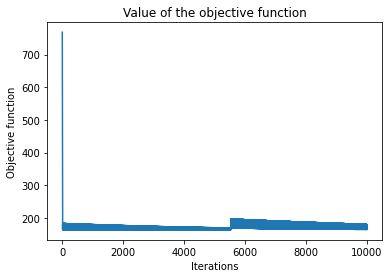

In [284]:
plt.xlabel( 'Iterations' )
plt.ylabel( 'Objective function' )
plt.title( 'Value of the objective function' )
# plt.xscale( 'log' )
# plt.yscale( 'log' )
plt.plot( F )

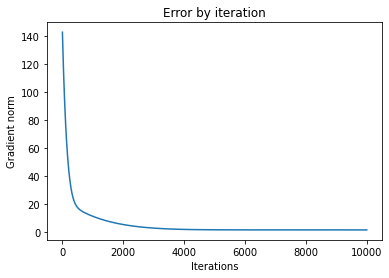

In [200]:
plt.xlabel( 'Iterations' )
plt.ylabel( 'Gradient norm' )
plt.title( 'Error by iteration' )
# plt.xscale( 'log' )
# plt.yscale( 'log' )
plt.plot( G )